# Ensemble Learning. Aprendizaje en conjunto
[Video](https://www.youtube.com/watch?v=7C_YpudYtw8&list=PLO_fdPEVlfKqMDNmCFzQISI2H_nJcEDJq&index=29)

En este notebook veremos de Ensemble Learning, o en español el Aprendizaje en Conjunto, una técnica para entrenar muchos modelos de ML y extraer una predicción de un grupo de modelos. Para esto existen tres enfoques distintos muy importantes: 
- Bagging. Paralelo
- Boostring. En serie
- Stacking. Apilado

El algoritmo sobre el que se centra esta técnica es el archiconocido Random Forest, y el concepto con el que trabaja el aprendizaje en conjunto es denominado como: "La sabiduría de la multitud".

### The wisdom of the crowd. La sabiduría de la multitud.

Imaginemos que entrenamos varios modelos por separado. Cada uno de ellos nos da un rendimiento en torno al 70%. Al combinar los modelos y realizar predicciones en conjunto el rendimiento que obtenemos es mayor. Este resultado no es fruto del azar, viene del fenómeno que es llamado "la sabiduría de la multitud"

La unión hace la fuerza

Este comportamiento se explica gracias a la [Ley de los grandes números](https://es.wikipedia.org/wiki/Ley_de_los_grandes_n%C3%BAmeros) y aunque parezca infalible tiene un pequeño inconveniente. 
A priori puede parecer que cuantos más modelos entrenemos mejor será el rendimiento de nuestro conjunto de aprendizaje, pero si el rendimiento de cada modelo por separado no supera el 50% el resultado de iterar miles de veces nuestras predicciones nos hará caer el rendimiento a 0.
Además, necesitamos que los modelos que usemos sean "diversos", es decir, que no tengan todos los mismos sesgos. De esta manera minimizaremos el efecto negativo que tienen los sesgos y equilibraremos el resultado.

En resumen, para hacer un buen uso de la sabiduría de la multitud necesitamos:
- Tamaño (muchos modelos)
- Eficiencia (rendimiento +50%)
- Diversidad (sesgos distintos)

[Leer más sobre Ensemble methods](https://scikit-learn.org/stable/modules/ensemble.html)
[Leer más sobre sklearn.ensemble](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble)

## Bagging. Aprendizaje en paralelo
En esta técnica entrenamos a múltiples copias de un modelo sobre una muestra aleatoria de los datos. El proceso se lleva a cabo gracias a una técnica de repartición aleatoria llamada 'Bootstrapping'. 
Se entrenan los modelos con estas muestras aleatorias y se reagrpan los rendimientos para hacer predicciones más precisas. 
En este proceso los modelos pueden sufrir de sobreajuste(overfitting), pero al combinarlos disminuye la varianza y por lo tanto se reduce el problema.

El algoritmo por extelencia para este trabajo es el `RandomForest`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

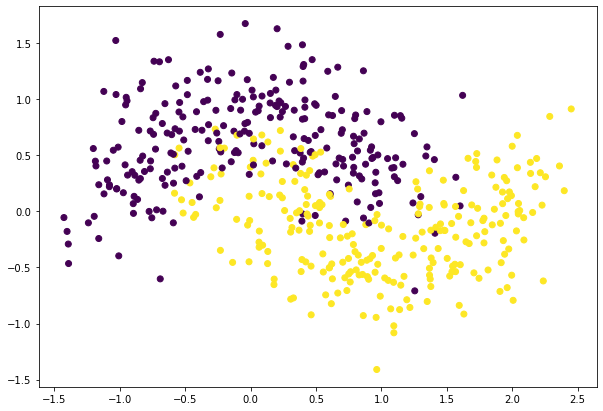

In [7]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=0)

plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

## Boosting. Aprendizaje en serie
En el caso del Boosting entrenamos un modelo con los datos y luego le damos al siguiente modelo los datos y los errores del modelo anterior. Este proceso se realiza múltiples veces hasta alcanzar un rendimiento óptimo. 
Para este proceso los modelos no son muy fuertes y es posible que sufran de infraajuste(underfitting), con la combinación reducimos el bayas.
En este área encontramos los algoritmos de `AdaBoost` y `Gradient Boosting`

## Stacking. Aprendizaje acumulado
Podríamos decir que el Staking es una combinación de las dos ideas anteriores. Para este caso partiremos como en el Bagging de muestras aleatorias de datos que les daremos a múltiples copias de nuestro modelo para que realice su entrenamiento. 
Una vez hecho esto, en lugar de reunir los rendimiento en total lo que haremos será proporcionar las predicciones a un último modelo para entrenarlo con esos datos y conseguir un rendimiento mayor.